In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import tree
import graphviz
from sklearn.cross_validation import train_test_split
%matplotlib inline

C:\Users\NARENDRA\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [4]:
credit = pd.read_csv('credit.csv')
credit.head()
credit.info()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
Unnamed: 0    400 non-null int64
Income        400 non-null float64
Limit         400 non-null int64
Rating        400 non-null int64
Cards         400 non-null int64
Age           400 non-null int64
Education     400 non-null int64
Gender        400 non-null object
Student       400 non-null object
Married       400 non-null object
Ethnicity     400 non-null object
Balance       400 non-null int64
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


In [5]:
credit.isnull().sum()

Unnamed: 0    0
Income        0
Limit         0
Rating        0
Cards         0
Age           0
Education     0
Gender        0
Student       0
Married       0
Ethnicity     0
Balance       0
dtype: int64

In [7]:
credit['Balanace_per_card'] = credit['Balance']/credit['Cards']

In [8]:
credit.sample(5)

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Balanace_per_card
58,59,10.354,3480,281,2,70,17,Male,No,Yes,Caucasian,333,166.5
308,309,14.956,4640,332,2,33,6,Male,No,No,Asian,681,340.5
278,279,128.040,6982,518,2,78,11,Female,No,Yes,Caucasian,250,125.0
126,127,26.427,5533,433,5,50,15,Female,Yes,Yes,Asian,1404,280.8
151,152,35.864,4831,353,3,66,13,Female,No,Yes,Caucasian,534,178.0


In [13]:
credit = credit.drop(['Unnamed: 0'],axis=1)
credit.head()

,Income,Limit,Rating,Age,Education,Gender,Student,Married,Ethnicity,Balanace_per_card
0,14.891,3606,283,34,11,Male,No,Yes,Caucasian,166.500000
1,106.025,6645,483,82,15,Female,Yes,Yes,Asian,301.000000
2,104.593,7075,514,71,11,Male,No,No,Asian,145.000000
3,148.924,9504,681,36,11,Female,No,No,Asian,321.333333
4,55.882,4897,357,68,16,Male,No,Yes,Caucasian,165.500000


In [16]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
Income               400 non-null float64
Limit                400 non-null int64
Rating               400 non-null int64
Age                  400 non-null int64
Education            400 non-null int64
Gender               400 non-null object
Student              400 non-null object
Married              400 non-null object
Ethnicity            400 non-null object
Balanace_per_card    400 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 31.3+ KB


In [14]:
credit.count()

Income               400
Limit                400
Rating               400
Age                  400
Education            400
Gender               400
Student              400
Married              400
Ethnicity            400
Balanace_per_card    400
dtype: int64

In [15]:
credit.describe()

,Income,Limit,Rating,Age,Education,Balanace_per_card
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,55.667500,13.450000,220.949879
std,35.244273,2308.198848,154.724143,17.249807,3.125207,249.951792
min,10.354000,855.000000,93.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,41.750000,11.000000,22.562500
50%,33.115500,4622.500000,344.000000,56.000000,14.000000,167.433333
75%,57.470750,5872.750000,437.250000,70.000000,16.000000,314.375000
max,186.634000,13913.000000,982.000000,98.000000,20.000000,1448.000000


In [22]:
for col in credit.columns:
    if credit[col].dtype == 'object':
        print(np.round(credit.groupby(col)['Balanace_per_card'].mean(),2)) 

Gender
Female    213.59
Male      228.85
Name: Balanace_per_card, dtype: float64
Student
No     203.02
Yes    382.29
Name: Balanace_per_card, dtype: float64
Married
No     218.71
Yes    222.37
Name: Balanace_per_card, dtype: float64
Ethnicity
African American    212.17
Asian               220.45
Caucasian           225.57
Name: Balanace_per_card, dtype: float64


In [24]:
for col in credit.columns:
    if credit[col].dtype == 'object':
        print(np.round(credit.groupby(col)['Income','Limit','Rating','Age','Education'].mean(),2))

        Income    Limit  Rating    Age  Education
Gender                                           
Female   44.85  4756.52  356.27  55.73      13.43
Male     45.61  4713.17  353.52  55.60      13.47
         Income    Limit  Rating    Age  Education
Student                                           
No        44.99  4740.22  355.04  55.84      13.38
Yes       47.29  4694.00  354.00  54.12      14.12
         Income    Limit  Rating    Age  Education
Married                                           
No        43.64  4645.30  347.80  57.25      13.26
Yes       46.22  4792.73  359.46  54.67      13.57
                  Income    Limit  Rating    Age  Education
Ethnicity                                                  
African American   47.68  4881.60  365.07  57.51      13.53
Asian              44.19  4607.82  345.43  53.91      13.61
Caucasian          44.52  4728.46  354.77  55.65      13.33


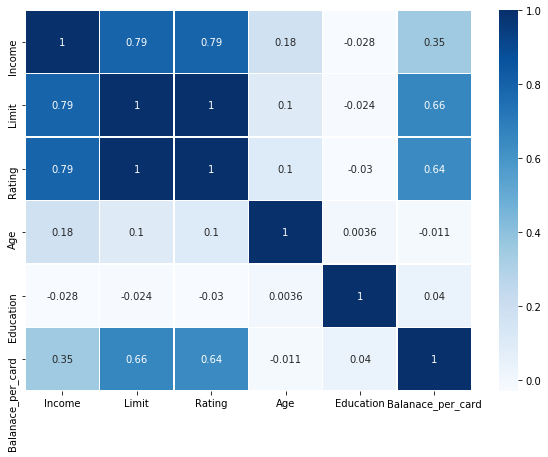

In [30]:
plt.figure(figsize=(10,7))
sns.heatmap(credit.corr(),annot=True,linewidth=0.5,cmap='Blues');

In [31]:
credit.columns

Index(['Income', 'Limit', 'Rating', 'Age', 'Education', 'Gender', 'Student',
       'Married', 'Ethnicity', 'Balanace_per_card'],
      dtype='object')

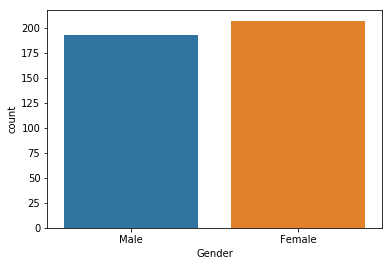

In [33]:
sns.countplot(x='Gender',data=credit);

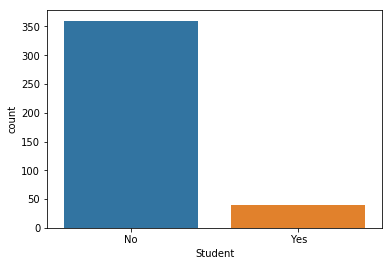

In [36]:
sns.countplot(x='Student',data=credit);

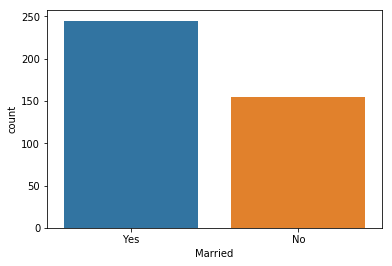

In [35]:
sns.countplot(x='Married',data=credit);

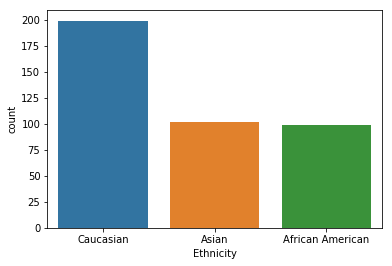

In [37]:
sns.countplot(x='Ethnicity',data=credit)

In [39]:
credit.columns

Index(['Income', 'Limit', 'Rating', 'Age', 'Education', 'Gender', 'Student',
       'Married', 'Ethnicity', 'Balanace_per_card'],
      dtype='object')

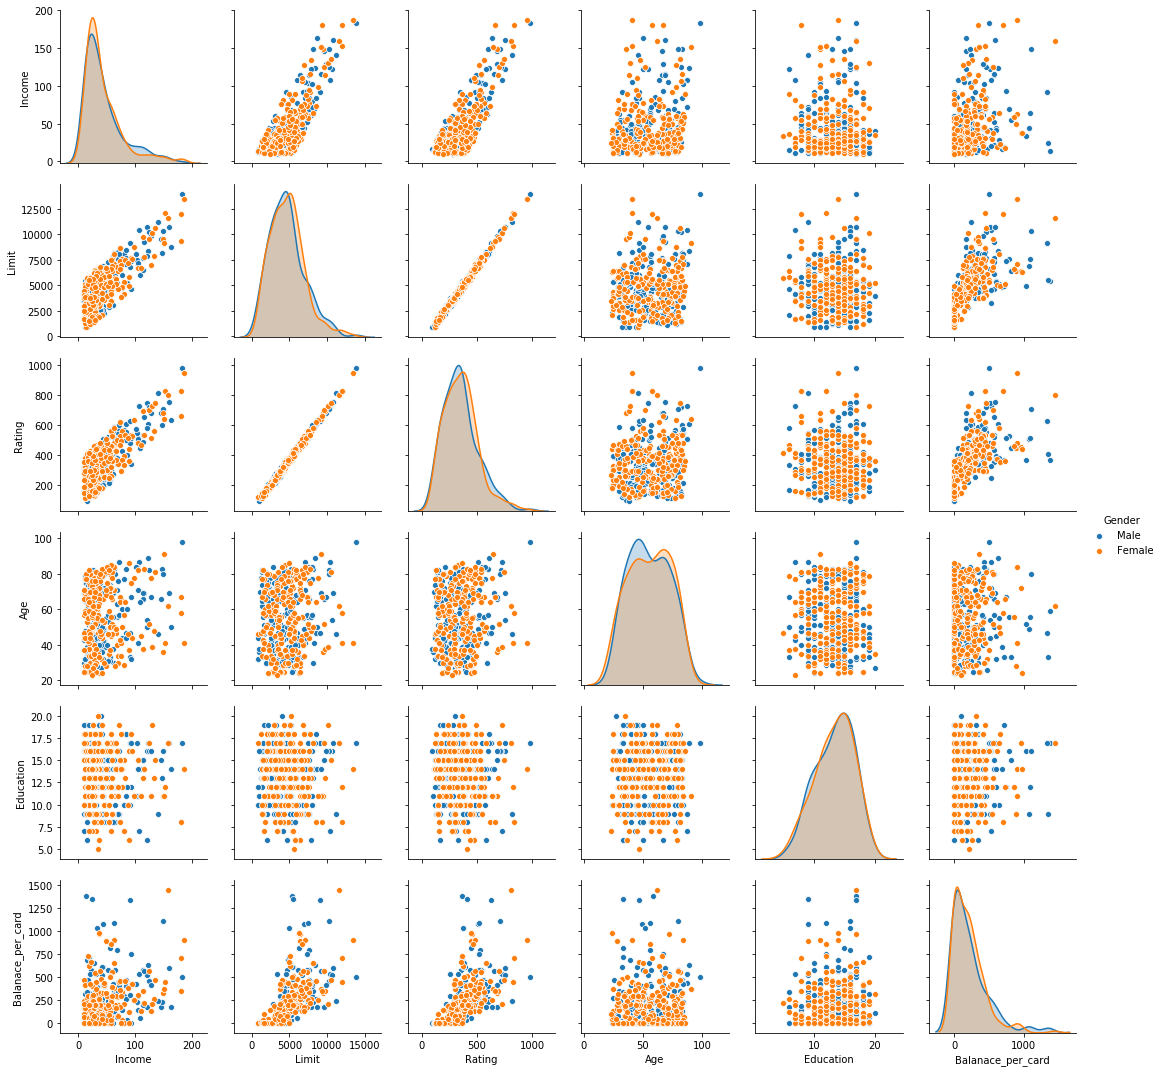

In [50]:
sns.pairplot(data=credit,hue='Gender',);

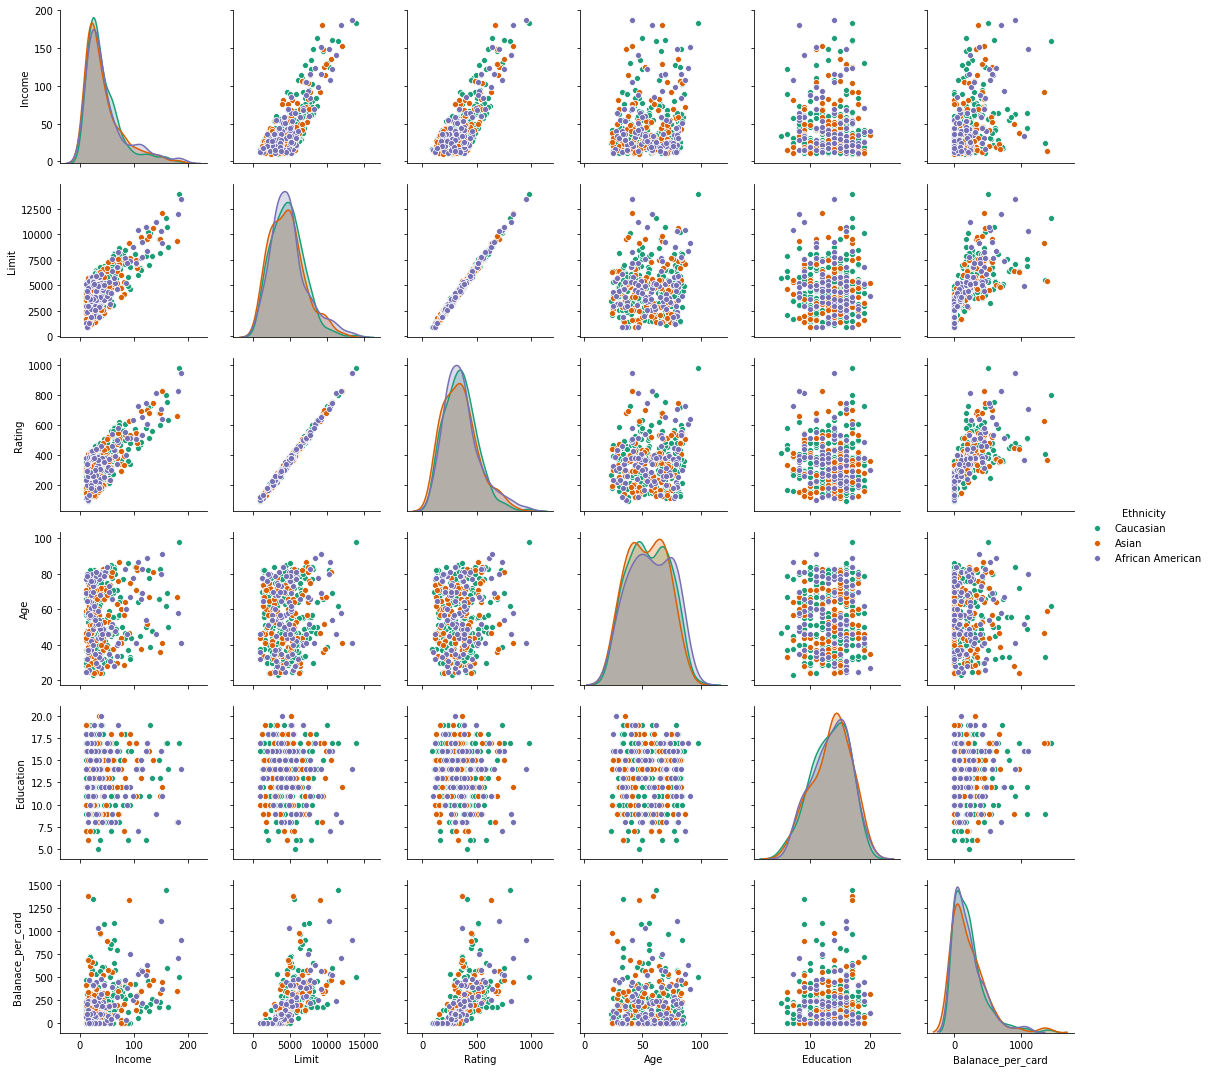

In [54]:
sns.pairplot(data=credit,hue="Ethnicity",diag_kind='kde',palette='Dark2');

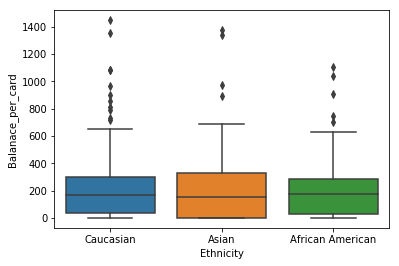

In [58]:
sns.boxplot(x='Ethnicity',y="Balanace_per_card",data=credit);

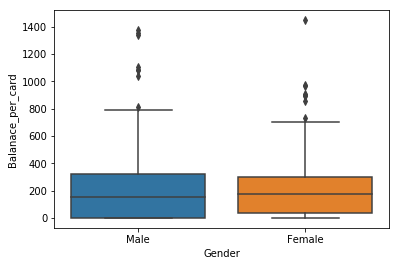

In [61]:
sns.boxplot(x='Gender',y='Balanace_per_card',data=credit);

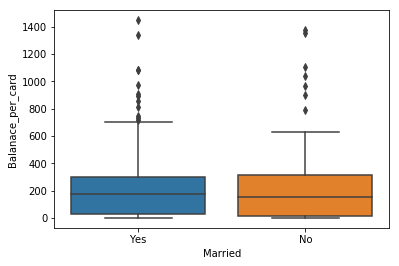

In [63]:
sns.boxplot(x='Married',y='Balanace_per_card',data=credit);

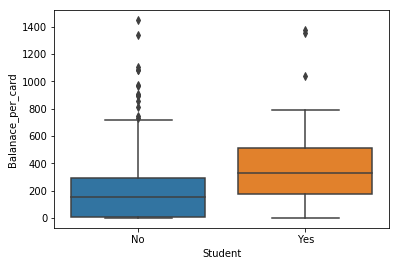

In [65]:
sns.boxplot(x='Student',y='Balanace_per_card',data=credit);

In [66]:
credit.columns

Index(['Income', 'Limit', 'Rating', 'Age', 'Education', 'Gender', 'Student',
       'Married', 'Ethnicity', 'Balanace_per_card'],
      dtype='object')

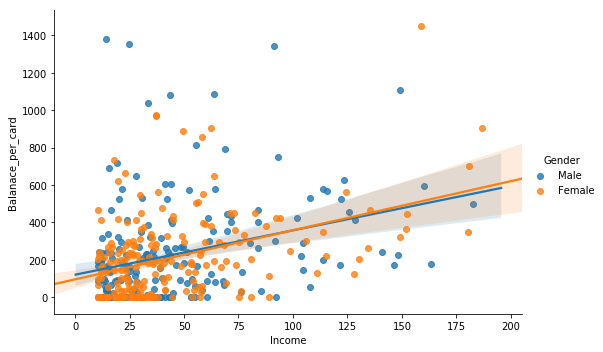

In [70]:
sns.lmplot(x='Income',y='Balanace_per_card',hue='Gender',data=credit,fit_reg=True,aspect=1.5);

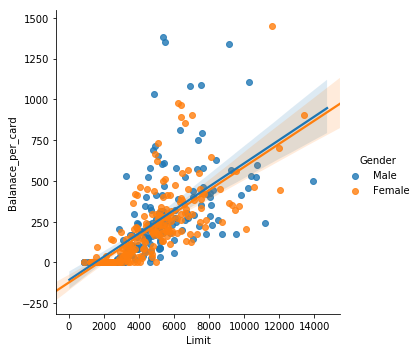

In [72]:
sns.lmplot(x='Limit',y="Balanace_per_card",hue='Gender',data=credit,fit_reg=True);

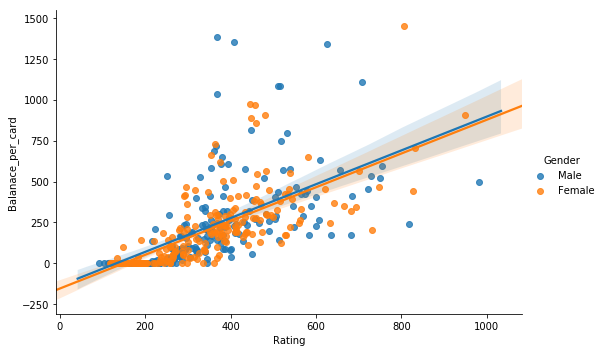

In [75]:
sns.lmplot(x='Rating',y='Balanace_per_card',hue='Gender',data=credit,fit_reg=True,aspect=1.5);

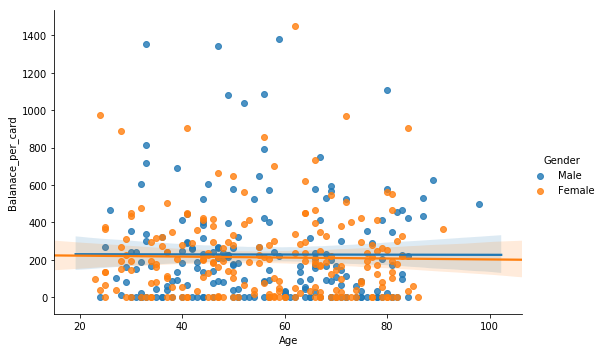

In [76]:
sns.lmplot(x='Age',y='Balanace_per_card',hue='Gender',data=credit,fit_reg=True,aspect=1.5);

In [77]:
for col in credit.columns:
    if credit[col].dtype == 'object':
        credit[col] = pd.Categorical(credit[col]).codes

In [78]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
Income               400 non-null float64
Limit                400 non-null int64
Rating               400 non-null int64
Age                  400 non-null int64
Education            400 non-null int64
Gender               400 non-null int8
Student              400 non-null int8
Married              400 non-null int8
Ethnicity            400 non-null int8
Balanace_per_card    400 non-null float64
dtypes: float64(2), int64(4), int8(4)
memory usage: 20.4 KB


In [79]:
credit

,Income,Limit,Rating,Age,Education,Gender,Student,Married,Ethnicity,Balanace_per_card
0,14.891,3606,283,34,11,1,0,1,2,166.500000
1,106.025,6645,483,82,15,0,1,1,1,301.000000
2,104.593,7075,514,71,11,1,0,0,1,145.000000
3,148.924,9504,681,36,11,0,0,0,1,321.333333
4,55.882,4897,357,68,16,1,0,1,2,165.500000
5,80.180,8047,569,77,10,1,0,0,2,287.750000
6,20.996,3388,259,37,12,0,0,0,0,101.500000
7,71.408,7114,512,87,9,1,0,0,1,436.000000
8,15.125,3300,266,66,13,0,0,0,2,55.800000
9,71.061,6819,491,41,19,0,1,1,0,450.000000


In [86]:
x = credit.drop(['Balanace_per_card'],axis=1)
y = credit['Balanace_per_card']
x.sample(5)
y.sample(5)

,Income,Limit,Rating,Age,Education,Gender,Student,Married,Ethnicity
34,20.150,2646,199,25,14,0,0,1,1
143,19.636,4896,387,64,10,0,0,0,0
74,16.103,5390,418,45,10,0,0,1,2
39,13.647,3461,264,47,14,1,0,1,2
44,31.861,6375,469,25,16,0,0,1,2


113    192.000000
199    190.333333
289    242.500000
63      33.250000
318      0.000000
Name: Balanace_per_card, dtype: float64

In [93]:
dt = tree.DecisionTreeRegressor(min_samples_leaf = 30)
dt = dt.fit(x,y)
dt

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=30,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [107]:
import graphviz
from sklearn import tree
from sklearn import metrics

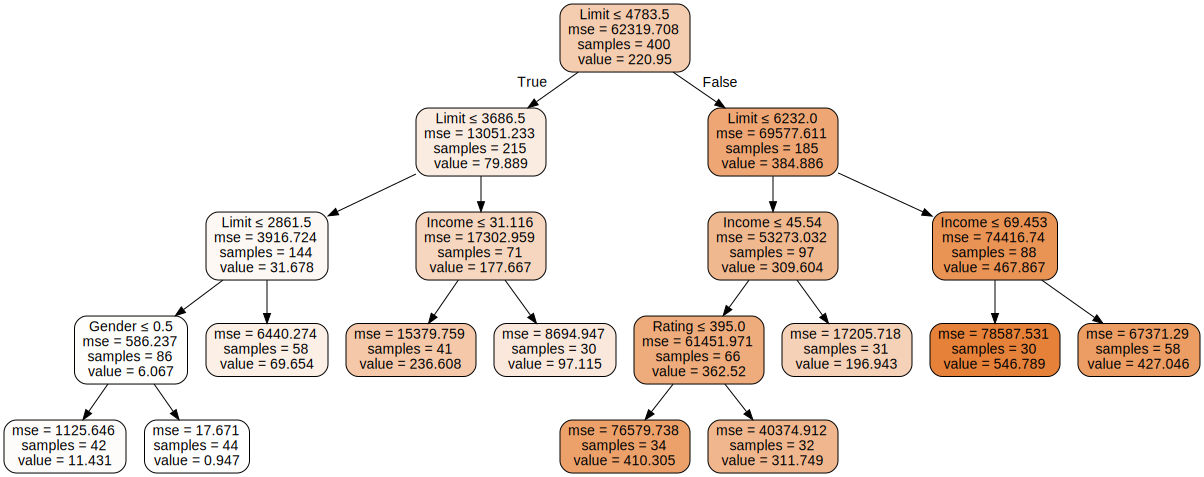

'credit.pdf'

In [100]:
dot_data = tree.export_graphviz(dt,out_file=None,feature_names = x.columns,class_names = y,filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph


In [101]:
graph.render('credit')

'credit.pdf'

In [102]:
y_pred = dt.predict(x)

In [110]:
np.round(metrics.r2_score(y,y_pred),2)

0.52

In [111]:
metrics.mean_absolute_error(y,y_pred)

101.64138953852824

In [113]:
np.sqrt(metrics.mean_squared_error(y,y_pred))

173.2574338158275

In [116]:
import statsmodels.api as sm

In [119]:
x2 = sm.add_constant(x)
x2.sample()

,const,Income,Limit,Rating,Age,Education,Gender,Student,Married,Ethnicity
27,1.0,32.793,4534,333,44,16,1,0,0,0


In [122]:
est = sm.OLS(y,x2)
est = est.fit()
print(est.summary());

                            OLS Regression Results                            
Dep. Variable:      Balanace_per_card   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     71.20
Date:                Thu, 03 Jan 2019   Prob (F-statistic):           8.70e-77
Time:                        20:53:44   Log-Likelihood:                -2581.2
No. Observations:                 400   AIC:                             5182.
Df Residuals:                     390   BIC:                             5222.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.3518     55.587     -0.618      0.5